In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:

!kaggle datasets download -d xainano/handwrittenmathsymbols

Dataset URL: https://www.kaggle.com/datasets/xainano/handwrittenmathsymbols
License(s): CC0-1.0
 99% 340M/343M [00:14<00:00, 39.9MB/s]
100% 343M/343M [00:14<00:00, 25.4MB/s]


In [ ]:
import zipfile
zip = zipfile.ZipFile("/content/handwrittenmathsymbols.zip",'r')
zip.extractall("/content")
zip.close()

In [ ]:
import os
os.listdir('/content')  # or the directory where the images should be located


['.config',
 'handwrittenmathsymbols.zip',
 'test.jpeg',
 'handwritten_math_symbols_model.h5',
 'data.rar',
 'kaggle.json',
 'extracted_images',
 'sample_data']

In [ ]:
import os

# Check the contents of the extracted directory
extracted_dir = "/content/extracted_images"  # Update this path if necessary
print(os.listdir(extracted_dir))


['-', '!', ',', '+', '0', ')', '(']


In [ ]:
import os
import random

# Define the path to your dataset directory
dataset_dir = "/content/extracted_images"
target_count = 4000  # The number of images you want to keep in each folder

# Loop through each folder in the dataset directory
for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)

    # Check if the folder_path is a directory
    if os.path.isdir(folder_path):
        # List all files in the folder
        files = os.listdir(folder_path)

        # If the number of files exceeds the target count
        if len(files) > target_count:
            # Randomly select target_count files to keep
            files_to_keep = random.sample(files, target_count)

            # Identify files to remove
            files_to_remove = [file for file in files if file not in files_to_keep]

            # Remove the files that are not needed
            for file_name in files_to_remove:
                file_path = os.path.join(folder_path, file_name)
                os.remove(file_path)

            print(f'Reduced {folder} to {target_count} images.')

print("Image reduction process completed.")


Reduced - to 4000 images.
Reduced + to 4000 images.
Reduced 0 to 4000 images.
Reduced ) to 4000 images.
Reduced ( to 4000 images.
Image reduction process completed.


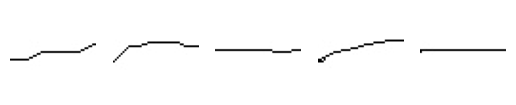

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# List to store all image file paths
all_images = []

# Loop through each symbol directory and collect image paths
for symbol in os.listdir(extracted_dir):
    symbol_path = os.path.join(extracted_dir, symbol)
    if os.path.isdir(symbol_path):  # Ensure it's a directory
        for img_file in os.listdir(symbol_path):
            if img_file.endswith(('.png', '.jpg', '.jpeg')):
                all_images.append(os.path.join(symbol_path, img_file))

# Display the first few images
for i, img_path in enumerate(all_images[:5]):
    img = Image.open(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

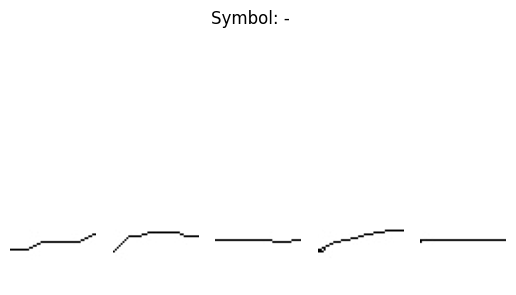

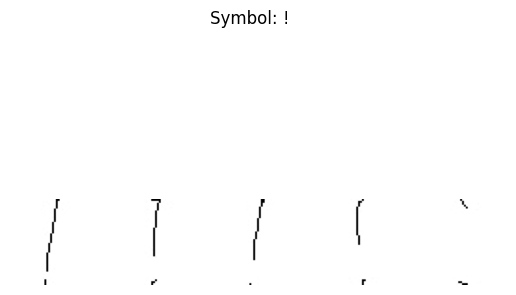

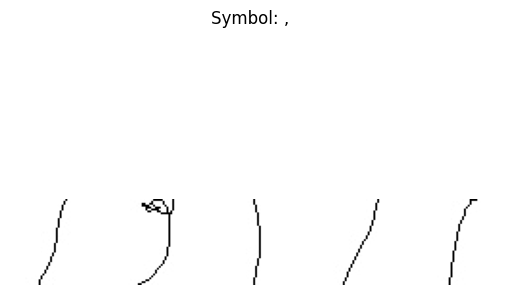

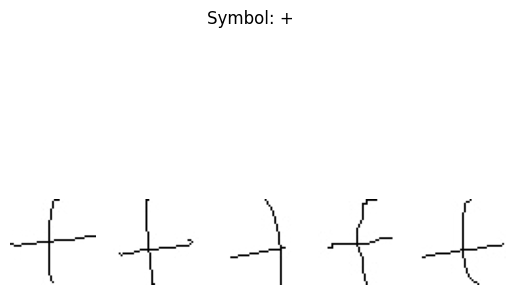

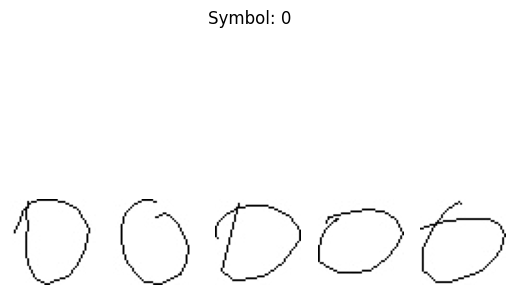

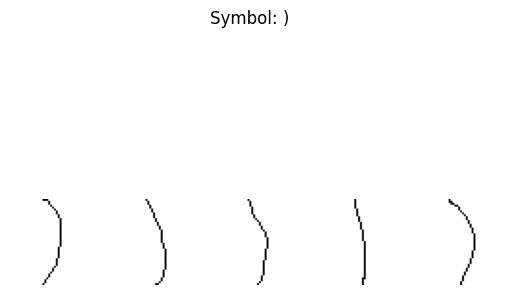

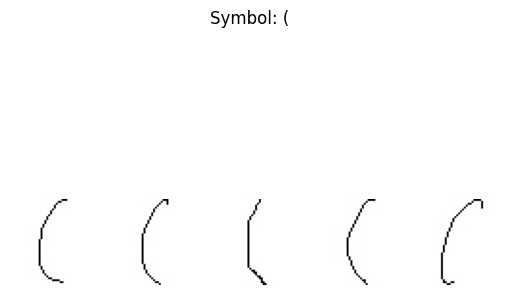

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the directory where the images are extracted
extracted_dir = "/content/extracted_images"  # Update this path if necessary

# Loop through each symbol directory and display up to 5 images from each
for symbol in os.listdir(extracted_dir):
    symbol_path = os.path.join(extracted_dir, symbol)
    if os.path.isdir(symbol_path):  # Ensure it's a directory
        image_files = [os.path.join(symbol_path, img_file)
                       for img_file in os.listdir(symbol_path)
                       if img_file.endswith(('.png', '.jpg', '.jpeg'))]

        # Display up to 5 images from this directory
        for i, img_path in enumerate(image_files[:5]):
            img = Image.open(img_path)
            plt.subplot(1, 5, i + 1)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
        plt.suptitle(f'Symbol: {symbol}')  # Title indicating the symbol
        plt.show()


Original Image:


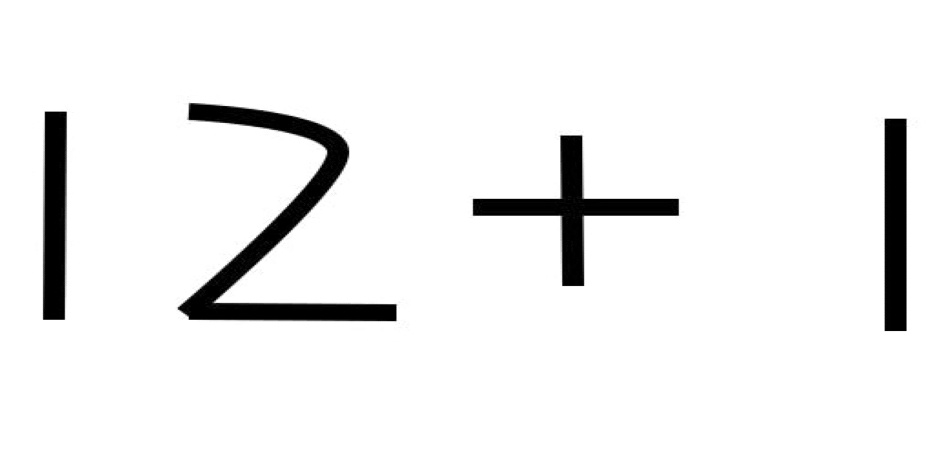

Binary Image:


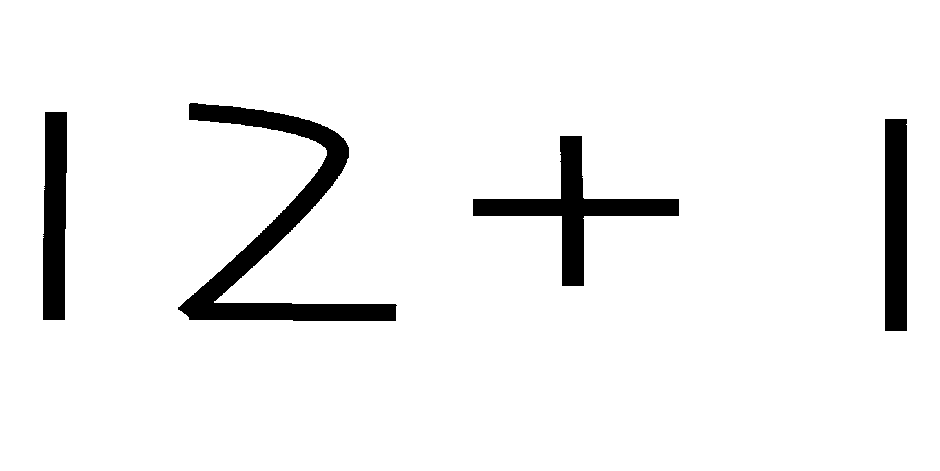

Inverted Image:


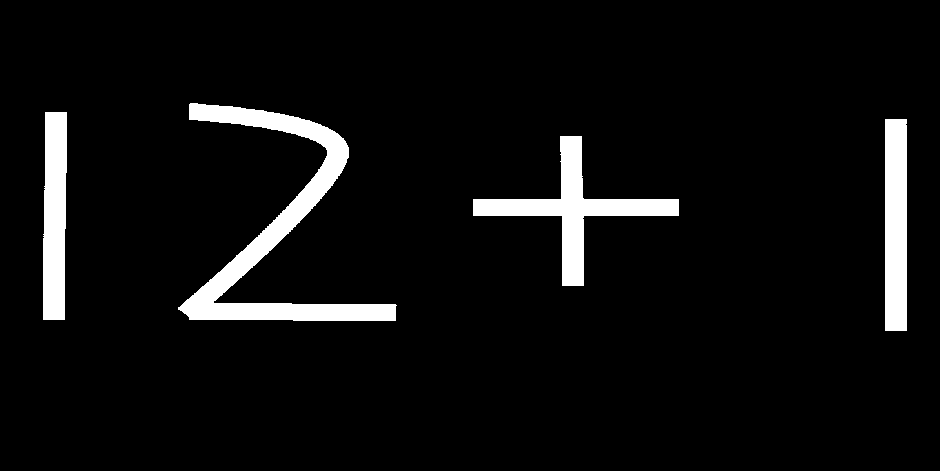

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Step 1: Load the image
image_path = '/content/test.jpeg'  # Replace with your image file path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Convert to binary image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Step 3: Invert the binary image (if digits/symbols are in black)
# The inversion is needed because usually white background is preferred.
inverted_image = cv2.bitwise_not(binary_image)

# Step 4: Display the images
print("Original Image:")
cv2_imshow(image)  # Display original image

print("Binary Image:")
cv2_imshow(binary_image)  # Display binary image

print("Inverted Image:")
cv2_imshow(inverted_image)  # Display inverted image

# Step 5: Save the inverted image (optional)
cv2.imwrite('/content/test.jpeg', inverted_image)  # Saves the inverted image to a file


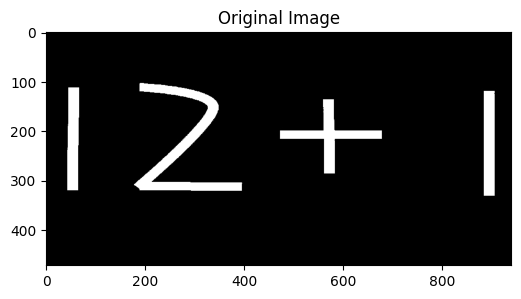

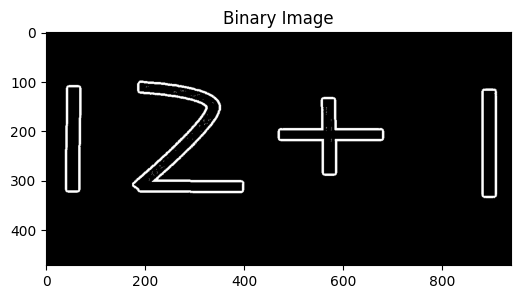

Number of contours found: 4


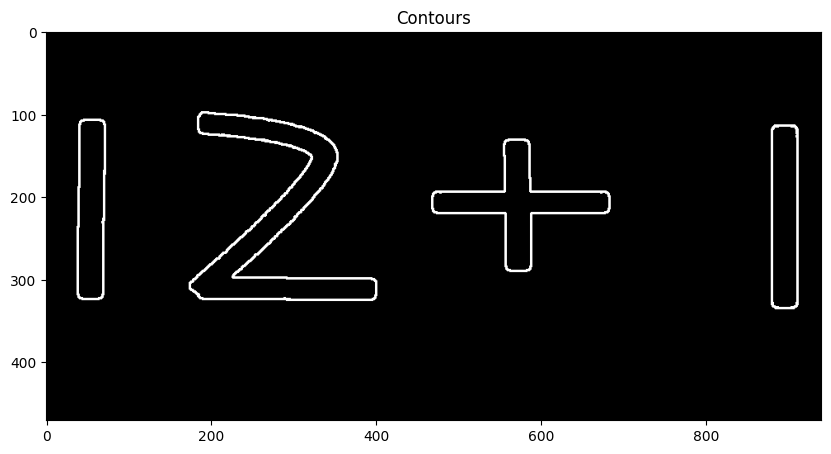

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/test.jpeg'  # Update the path if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    raise ValueError("Image not loaded. Check the path and try again.")

# Show the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# Apply adaptive thresholding to get a binary image
binary_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Show the binary image
plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.show()

# Find contours in the binary image
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Debug: Print number of contours found
print(f"Number of contours found: {len(contours)}")

# Create an empty image to draw contours
contour_image = np.zeros_like(image)

# Draw all the contours
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 2)

# Display the image with contours
plt.figure(figsize=(10, 10))
plt.imshow(contour_image, cmap='gray')
plt.title('Contours')
plt.show()


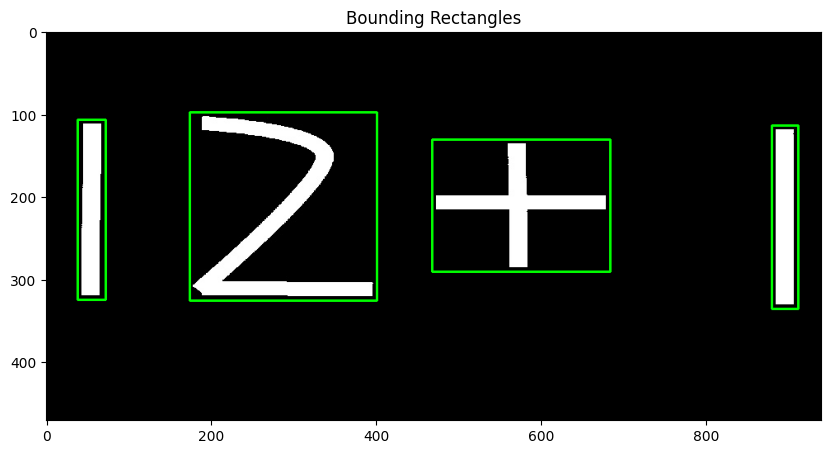

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/test.jpeg'  # Update the path if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply adaptive thresholding to get a binary image
binary_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a color image to draw rectangles (optional)
image_with_rectangles = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Iterate over each contour
for contour in contours:
    # Get the bounding rectangle for each contour
    x, y, w, h = cv2.boundingRect(contour)

    # Draw the bounding rectangle on the image
    cv2.rectangle(image_with_rectangles, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding rectangles
plt.figure(figsize=(10, 10))
plt.imshow(image_with_rectangles)
plt.title('Bounding Rectangles')
plt.show()


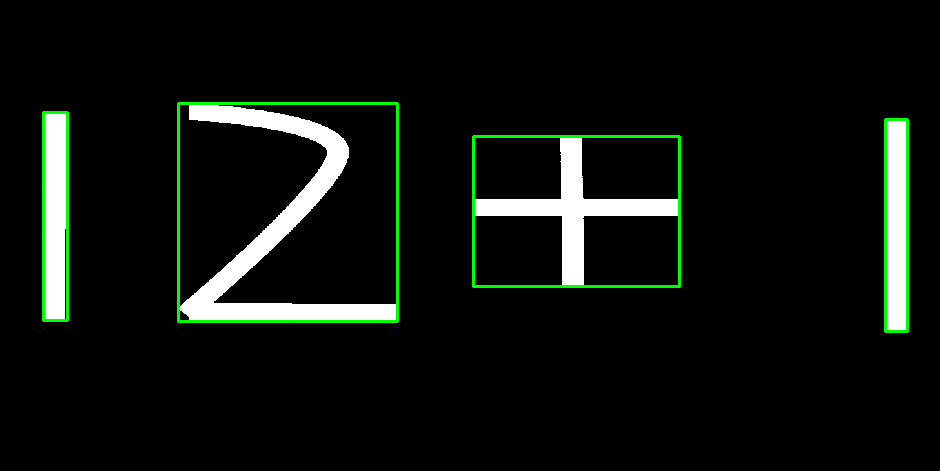

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

def are_rectangles_overlapping(rect1, rect2):
    # Extract coordinates of rectangles
    x1, y1, w1, h1 = rect1
    x2, y2, w2, h2 = rect2

    # Calculate the intersection coordinates
    x_left = max(x1, x2)
    y_top = max(y1, y2)
    x_right = min(x1 + w1, x2 + w2)
    y_bottom = min(y1 + h1, y2 + h2)

    # Check if there is an intersection
    if x_left < x_right and y_top < y_bottom:
        return True
    return False

def process_contours(image):
    # Convert to grayscale and find contours
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get bounding rectangles for each contour
    bounding_rects = [cv2.boundingRect(cnt) for cnt in contours]

    # List to keep track of non-overlapping bounding rectangles
    filtered_rects = []

    for i, rect1 in enumerate(bounding_rects):
        x1, y1, w1, h1 = rect1
        keep = True
        for j, rect2 in enumerate(bounding_rects):
            if i != j:
                if are_rectangles_overlapping(rect1, rect2):
                    x2, y2, w2, h2 = rect2
                    if (w1 * h1) < (w2 * h2):
                        keep = False
                        break
        if keep:
            filtered_rects.append(rect1)

    return filtered_rects

def draw_filtered_contours(image, filtered_rects):
    output_image = image.copy()
    for rect in filtered_rects:
        x, y, w, h = rect
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return output_image

# Example usage
image_path = '/content/test.jpeg'  # Update with your image path
image = cv2.imread(image_path)

# Check if the image was loaded
if image is None:
    raise ValueError(f"Image not found or unable to load the image at path: {image_path}")

filtered_rects = process_contours(image)
output_image = draw_filtered_contours(image, filtered_rects)

# Use cv2_imshow for displaying the image in Colab
cv2_imshow(output_image)


In [ ]:
# Function to check if two rectangles overlap
def is_overlapping(rect1, rect2):
    x1, y1, w1, h1 = rect1
    x2, y2, w2, h2 = rect2
    return not (x1 > x2 + w2 or x2 > x1 + w1 or y1 > y2 + h2 or y2 > y1 + h1)

# Find bounding rectangles
rectangles = [cv2.boundingRect(contour) for contour in contours]

# Filter overlapping rectangles
filtered_rectangles = []
for rect in rectangles:
    discard = False
    for other_rect in filtered_rectangles:
        if is_overlapping(rect, other_rect):
            # Discard the smaller rectangle
            if rect[2] * rect[3] < other_rect[2] * other_rect[3]:
                discard = True
                break
            else:
                filtered_rectangles.remove(other_rect)
                break
    if not discard:
        filtered_rectangles.append(rect)

# Draw the filtered rectangles
for x, y, w, h in filtered_rectangles:
    cv2.rectangle(image_with_rectangles, (x, y), (x + w, y + h), (0, 255, 0), 2)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Initialize a list to store resized images
resized_images = []

# Iterate through the filtered bounding rectangles
for x, y, w, h in filtered_rectangles:
    # Crop the image using the bounding rectangle
    cropped_image = image_with_rectangles[y:y+h, x:x+w]

    # Resize the cropped image to 28x28
    resized_image = cv2.resize(cropped_image, (28, 28))

    # Append the resized image to the list
    resized_images.append(resized_image)

# If you want to display the resized images
for i, img in enumerate(resized_images):
    cv2_imshow(img)



In [ ]:
# Define the label mapping
label_mapping = {
    "0": 0, "1": 1, "2": 2, "3": 3, "4": 4,
    "5": 5, "6": 6, "7": 7, "8": 8, "9": 9,
    "-": 10, "+": 11, "times": 12
}

# Reverse mapping to get symbols from labels
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Convert predicted numbers to symbols
def convert_to_symbols(predicted_labels):
    symbols = [reverse_label_mapping.get(label, '') for label in predicted_labels]
    return ''.join(symbols)

# Example predicted_labels (should be integers)
predicted_labels = [3, 11, 5, 12, 2]  # Example predicted labels

# Convert and prepare for evaluation
predicted_string = convert_to_symbols(predicted_labels)

# Replace 'times' with '*'
converted_string = predicted_string.replace('times', '*')

# Evaluate the equation safely
try:
    result = eval(converted_string)
    print(f"Equation: {converted_string}")
    print(f"Result: {result}")
except Exception as e:
    print(f"Error evaluating the equation: {converted_string}")
    print(str(e))


Equation: 3+5*2
Result: 13
